In [1]:
import os

os.chdir("../..")  # need to set path to repo root

In [2]:
from src.dataset import get_segmentation_df

segmentation_df = get_segmentation_df()
segmentation_df.head()
# can be multiple annotations per image, each one represents an individual card and its bounding box

,image_path,x,y,width,height,rotation
0,db/shared/jpg/segmentation/front_scans/0_41855...,14.652956,29.695024,73.264781,64.365971,0.000000
1,db/shared/jpg/segmentation/front_scans/0_41855...,12.728191,29.402256,74.005400,62.439819,1.167279
2,db/shared/jpg/segmentation/front_scans/0_41855...,12.698413,29.534510,74.603175,62.760835,0.000000
3,db/shared/jpg/segmentation/front_scans/0_41855...,15.022358,30.461750,73.262068,62.118780,0.937271
4,db/shared/jpg/segmentation/front_scans/0_41855...,14.138817,29.855538,74.035990,64.365971,0.000000


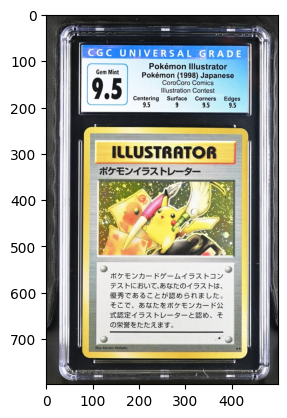

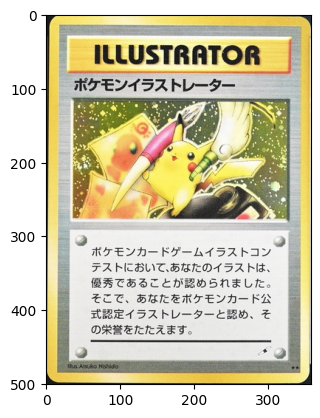

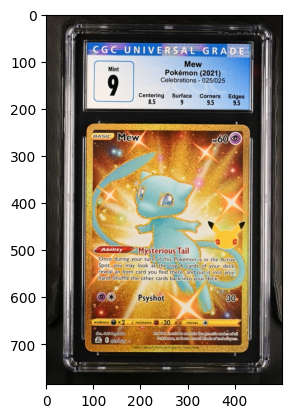

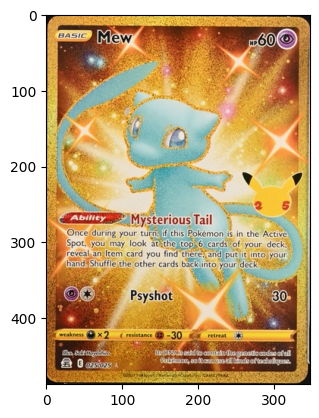

In [3]:
from src.shared.image import display_image, crop_image
from src.shared.storage import Database, ImageStorage
from PIL import Image

# disk storage wrapper for shared nested repository, acts as a "bucket"
front_scans_storage = ImageStorage("segmentation/front_scans", db=Database.SHARED)

# grab 0th annotation and display it
for i in range(101, 103):
    annotation_0 = segmentation_df.iloc[i]
    img = Image.open(annotation_0["image_path"])

    top = annotation_0["y"] / 100
    right = (100 - (annotation_0["x"] + annotation_0["width"])) / 100
    bottom = (100 - (annotation_0["y"] + annotation_0["height"])) / 100
    left = annotation_0["x"] / 100
    rotation = annotation_0["rotation"]

    display_image(img)

    cropped_img = crop_image(
        img,
        top,
        right,
        bottom,
        left,
        rotation,
    )
    display_image(cropped_img)

In [4]:
# Don't have annotations yet :-/
other_scans_storage = ImageStorage("segmentation/other_scans", db=Database.SHARED)
other_scans_storage.size()

28

In [5]:
# YOLOv7 / Detectron2